# 6. Images as arrays

In the previous chapters, we have learned about Numpy arrays in general. These structures can hold any type of data but they are particularly ideal to store image data. Indeed in fields such as biomedical imaging or satellite imagery, multi-dimensional data are acquired that easy to process as arrays. In this chapter, we make therefore a small detour to see how to use arrays for images (if you are only interested in dealing with tabular data, you can skip this chapter).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing data

There are many libraries to open image data. Some are more general and some dedicated to specific fields with specific image formats. However most of them have in common that they import those various image formats as Numpy arrays.

Here we use the import module of scikit-image which is a general purpose image processing library for Python. We import an image directly from the internet but any local image can also be opened by using its path. Here we have a fluorescence microscopy image of Saccharomyces cerevisiae with a signal accumulating in the vacuoles.

In [6]:
import skimage
import skimage.io

In [3]:
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

In [4]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [5]:
type(image)

numpy.ndarray

We see above that the tif file was indeed imported as a Numpy array. In addition we see that the pixels hare unsigned integer 16 bits, a common format for iamges.

We can now check how many pixels and dimensions we have:

In [7]:
image.shape

(1024, 1360)

These numbers tell us that our array has 1024 lines and 1360 columns but no other dimensions. So we have a plain gray-scale image. We have just seen that we could use Matplotlib to plot e.g. scatterplots and histograms. We can also use it to simply display 2D arrays, i.e. images, using the ```imshow``` function:

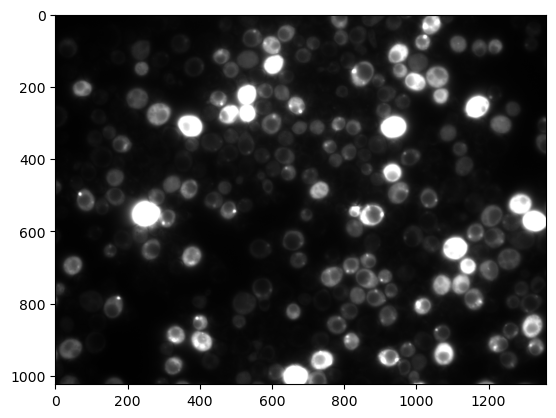

In [7]:
plt.imshow(image, cmap='gray');

In addition to the ```image``` input we also used an *optional* parameter called ```cmap``` here and that allows us to set a certain colormap, here a gray one. You can find more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential

## Multi-dimensional images

Let's import now another image:

In [10]:
image_multi = skimage.io.imread('https://github.com/guiwitz/microfilm/raw/master/demodata/coli_nucl_ori_ter.tif')

In [12]:
image_multi.shape

(3, 30, 220, 169)

Now this image has more than just rows and columns of pixels. In total we have 4 dimensions, the last two corresponding to pixels. The two first correspond to different channels (3) and time-points (30). If we want to access and plot a given 2D image, we have to use indexing. For example, let's display the 2nd channel of the 10th time point:

In [16]:
im_singleplane = image_multi[1, 9].copy()

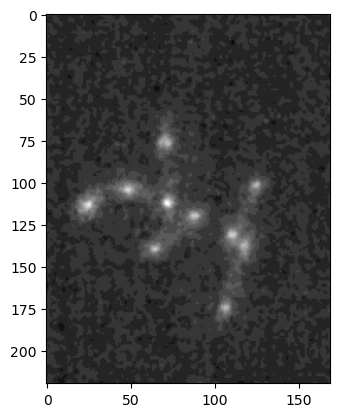

In [20]:
plt.imshow(im_singleplane, cmap='gray');

## Cropping

A common operation is to only consider part of an image for further analysis. We have learned in the previous chapters that we could use indexing to extract only part of an array which for an image is called cropping. For example, we might want to focus on the rows around 110 and columns around 50:

In [21]:
im_crop = im_singleplane[90:130, 30:70].copy()

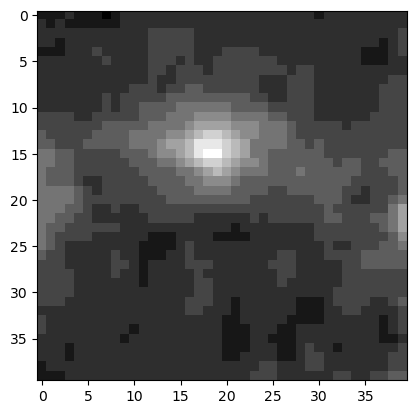

In [22]:
plt.imshow(im_crop, cmap='gray');

**Note that we additionally use here the ```copy``` method. This ensures that whatever modification we make to the cropped version doesn't affect the original image!**.

We can also check again the size of this cropped image. We expect 130 rows and 200 columns:

In [24]:
im_crop.shape

(40, 40)

## Operations on images

All the operations we have seen for arrays in general are of course still valid for images. So we can do simple calculus or apply functions to images:

In [25]:
im_crop_plus_three = im_crop + 3

In [26]:
im_crop_plus_three

array([[102, 102, 102, ..., 103, 103, 103],
       [103, 102, 103, ..., 103, 103, 103],
       [103, 103, 103, ..., 103, 103, 104],
       ...,
       [103, 103, 103, ..., 103, 104, 104],
       [102, 103, 103, ..., 103, 104, 104],
       [102, 102, 102, ..., 104, 105, 105]], dtype=uint16)

In [27]:
im_crop

array([[ 99,  99,  99, ..., 100, 100, 100],
       [100,  99, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 101],
       ...,
       [100, 100, 100, ..., 100, 101, 101],
       [ 99, 100, 100, ..., 100, 101, 101],
       [ 99,  99,  99, ..., 101, 102, 102]], dtype=uint16)

In [29]:
im_crop * 3

array([[297, 297, 297, ..., 300, 300, 300],
       [300, 297, 300, ..., 300, 300, 300],
       [300, 300, 300, ..., 300, 300, 303],
       ...,
       [300, 300, 300, ..., 300, 303, 303],
       [297, 300, 300, ..., 300, 303, 303],
       [297, 297, 297, ..., 303, 306, 306]], dtype=uint16)

In [30]:
np.log(im_crop)

array([[4.59512  , 4.59512  , 4.59512  , ..., 4.6051702, 4.6051702,
        4.6051702],
       [4.6051702, 4.59512  , 4.6051702, ..., 4.6051702, 4.6051702,
        4.6051702],
       [4.6051702, 4.6051702, 4.6051702, ..., 4.6051702, 4.6051702,
        4.6151204],
       ...,
       [4.6051702, 4.6051702, 4.6051702, ..., 4.6051702, 4.6151204,
        4.6151204],
       [4.59512  , 4.6051702, 4.6051702, ..., 4.6051702, 4.6151204,
        4.6151204],
       [4.59512  , 4.59512  , 4.59512  , ..., 4.6151204, 4.624973 ,
        4.624973 ]], dtype=float32)

## Projections

When handling images, the ```min```, ```max``` are very relevant as they implement the common **projections** that one often performs on multi-dimensional data. For example if we wanted to project all time-points on a single plane using mean intensity projection, we would write:

In [36]:
image_multi.shape

(3, 30, 220, 169)

In [37]:
im_proj = image_multi.mean(axis=1)

In [38]:
im_proj.shape

(3, 220, 169)

We see that the time-axis has been compressed to a single image, and we are left with just the three channels projected across time:

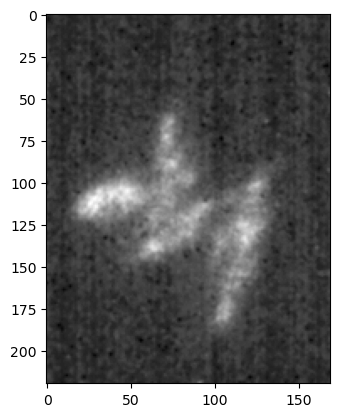

In [39]:
plt.imshow(im_proj[1], cmap='gray');

### Operations between arrays

Operations between array now become operations between images. For example, we could add some noise to an image to test the quality of a denoising algorithm. First we create a noise image:

In [44]:
im_noise = np.random.normal(0,2,im_singleplane.shape)

In [45]:
im_singleplane_noisy = im_singleplane + im_noise

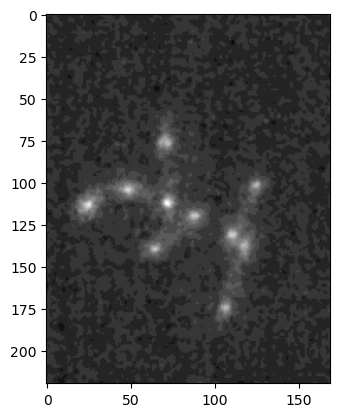

In [46]:
plt.imshow(im_singleplane, cmap='gray');

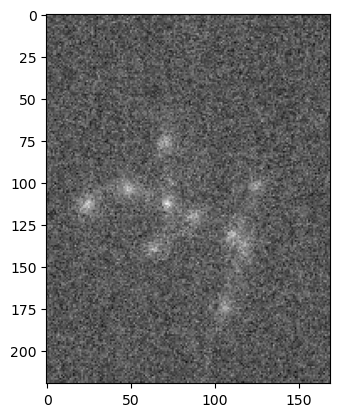

In [47]:
plt.imshow(im_singleplane_noisy, cmap='gray');

## Image processing operations

In addition to the standard mathematical operations provided by Numpy, we can of course also apply operations which are specifically designed for images. Such functions are typically provided by libraries like scikit-image. A classical example is the blurring of an image using a Gaussian filter:

In [61]:
im_gauss = skimage.filters.gaussian(im_singleplane, sigma=3, preserve_range=True)

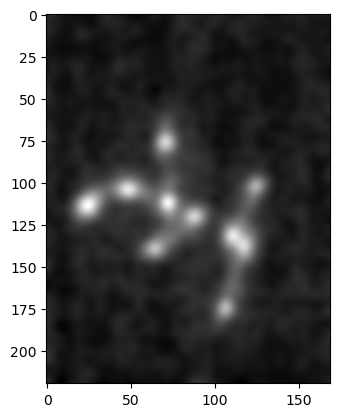

In [62]:
plt.imshow(im_gauss, cmap='gray');

## Masking

Finally, we have seen that we could create boolean arrays by applying inequality operations to arrays. In the world of images, this is typically used to thereshold an image, i.e. extracting only parts of the image which have an intensity higher that a given threshold. For example on the last example above:

In [79]:
im_thresholded = im_gauss > 102
im_thresholded

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

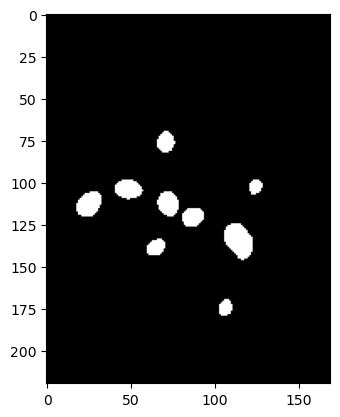

In [80]:
plt.imshow(im_thresholded, cmap='gray');

We see that we obtain a boolean array that we can still plot using ```imshow``` and that gives us a binary image with bright regions (above 103) shown as white (```True```) and darker ones as black (```False```). As before, we could now extract the values of those pixels by using logical indexing:

In [81]:
im_gauss[im_thresholded]

array([102.04097686, 102.08858084, 102.01750254, ..., 102.22472114,
       102.26016955, 102.17046093])

Finally we could compute the average values of these pixels:

In [82]:
im_gauss[im_thresholded].mean()

102.97284930525916

## Further

Image processing and computer vision is an entire field of research outside the scope of this introductory course. Common next steps are object detection, measurements, tracking etc. For an introduction to image processing you can check the course on GitHub [PyImageCourse_beginner](https://github.com/guiwitz/PyImageCourse_beginner).

## Exercise

1. Try to import this image: https://upload.wikimedia.org/wikipedia/commons/5/5b/Serengeti_Elefantenherde1.jpg?download

2. What are the dimensions of the image? Do you know what the dimensions are ?

3. Display just the last channel:

4. Try to crop the left-most elefant and display it in the first channel:

5. Create a thresholed image where only the elefant tooth is visible